## Multivariate Polynomial Regression with sklearn

In [27]:
import numpy as np
import pandas as pd


apartment_data_train = pd.DataFrame([
    {"size": 50, "price": 450, "rooms": 2, "distance_to_center": 5, "district": "Gievenbeck"},
    {"size": 25, "price": 500, "rooms": 1, "distance_to_center": 3.5, "district": "Sentrup"},
    {"size": 35, "price": 770, "rooms": 1, "distance_to_center": 3, "district": "Wienburg"},
    {"size": 80, "price": 800, "rooms": 3, "distance_to_center": 8, "district": "Nienberge"},
    {"size": 62, "price": 800, "rooms": 2, "distance_to_center": 5, "district": "Coerde"},
    {"size": 19, "price": 440, "rooms": 1, "distance_to_center": 7, "district": "Nienberge"},
    {"size": 73, "price": 1127, "rooms": 3.5, "distance_to_center": 5, "district": "Wienburg"},
])
apartment_data_validation = pd.DataFrame([
    {"size": 48, "price": 800, "rooms": 2, "distance_to_center": 3, "district": "Wienburg"},
    {"size": 20, "price": 550, "rooms": 1, "distance_to_center": 5, "district": "Coerde"},
    {"size": 70, "price": 820, "rooms": 3, "distance_to_center": 4.5, "district": "Gievenbeck"},
    {"size": 83, "price": 1200, "rooms": 3, "distance_to_center": 5, "district": "Wienburg"},
])


def mean_squared_error(y_true, y_pred, verbose=True):
    """
    Calculate the Mean Squared Error between the actual and predicted values.

    Parameters:
    y_true :    array-like
                actual values (ground truth)
    y_pred :    array-like
                predicted values
    """
    # Ensure inputs are 1D numpy arrays
    y_true = np.array(y_true).squeeze()
    y_pred = np.array(y_pred).squeeze()

    mse = ((y_true - y_pred) @ (y_true - y_pred)) / len(y_true)
    if verbose:
        print(f"MSE: {mse: ,.1f}")
    return mse

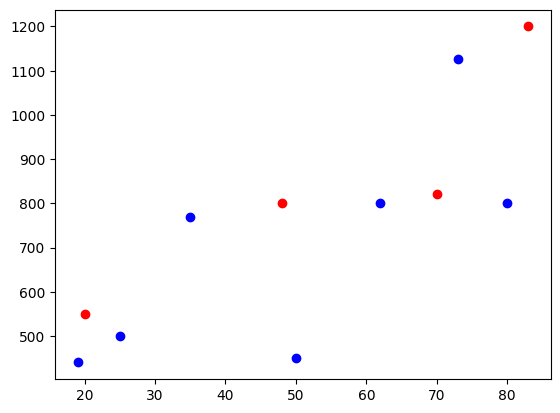

In [28]:
from matplotlib import pyplot as plt

plt.plot(apartment_data_train["size"], apartment_data_train["price"], "bo", label="Train Data")
plt.plot(apartment_data_validation["size"], apartment_data_validation["price"], "ro", label="Validation Data")
plt.legend()

What is a **multivariate** Polynomial? E.g. check out this $w$-parameterized ($w\in \mathbb{R}^6$) degree-$2$ polynomial $p_w$ in two variables $a, b$:
$$p_w(a, b) = \begin{bmatrix} 1 & a & b & a^2 & ab & b^2 \end{bmatrix}\begin{bmatrix} w_0 \\ w_1 \\ w_2 \\ w_3 \\ w_4 \\ w_5 \end{bmatrix}$$

- Use `sklearn` to produce multivariate polynomial features of degree $2$ in the variables `sizes`, `rooms`
- Use a linear `sklearn` model to predict `prices` from the polynomial features

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = apartment_data_train[["size", "rooms"]]
X_validate = apartment_data_validation[["size", "rooms"]]
y = apartment_data_train["price"]
y_validate = apartment_data_validation["price"]

# Polynomial Features
for polynomial_degree in range(9):
    Phi = PolynomialFeatures(degree=polynomial_degree).fit_transform(X)
    Phi_validate = PolynomialFeatures(degree=polynomial_degree).fit_transform(X_validate)

    # Train
    model = LinearRegression(fit_intercept=False)
    model.fit(Phi, y)

    # Validate
    predictions = model.predict(Phi_validate)
    mse = mean_squared_error(y_validate, predictions, verbose=False)
    print(f"Degree {polynomial_degree}: MSE = {mse:,.1f}")

Degree 0: MSE = 74,757.7
Degree 1: MSE = 22,583.1
Degree 2: MSE = 64,773.3
Degree 3: MSE = 66,408.0
Degree 4: MSE = 69,035.7
Degree 5: MSE = 207,277.9
Degree 6: MSE = 188,956.2
Degree 7: MSE = 51,596,219.0
Degree 8: MSE = 4,832,025,843.1


**Note**: For this very small dataset, already small polynomial degrees reveal Overfitting.